In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Part 1: Prepare the Data
1. Read myopia.csv into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

    Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values

In [2]:
file_path = Path("./Instructions/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df_myopia2 = df_myopia.drop("MYOPIC", axis=1)
df_myopia2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia2)

## Part 2: Apply Dimensionality Reduction
1.)Perform dimensionality reduction with PCA. How did the number of the features change?
    Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

2.)Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

3.)Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [5]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca_transformed_data

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [6]:
# tsne = TSNE(learning_rate=100)
tsne = TSNE(perplexity=50)
transformed_features = tsne.fit_transform(pca_transformed_data)
transformed_features

array([[ -5.8554344 ,  -9.619158  ],
       [  4.0622454 , -11.298053  ],
       [  0.28582644,  10.488738  ],
       ...,
       [  3.7336125 , -12.70049   ],
       [ -0.01345446,   6.4855103 ],
       [  8.076958  ,  -7.8360953 ]], dtype=float32)

In [7]:
df_myopia2["x"] = transformed_features[:,0]
df_myopia2["y"] = transformed_features[:,1]
df_myopia2["class"] = df_myopia["MYOPIC"]

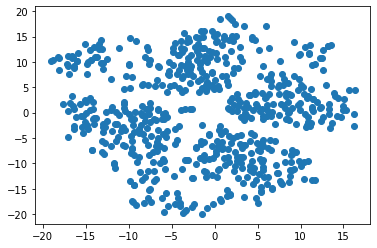

In [8]:
plt.scatter(df_myopia2["x"], df_myopia2["y"])
plt.show()

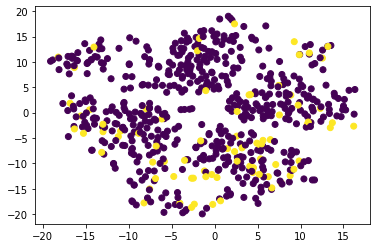

In [9]:
plt.scatter(df_myopia2["x"], df_myopia2["y"], c=df_myopia2["class"])

plt.show()

## Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:

-Use a for loop to determine the inertia for each k between 1 through 10.

-If possible, determine where the elbow of the plot is, and at which value of k it appears.


In [10]:
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [11]:
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(11)

C:\Users\Hannah GA\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,234077.487563
1,2,126281.996310
2,3,93178.921127
3,4,78306.115708
4,5,67315.950891
5,6,60220.039637
6,7,54488.791258
7,8,50474.771543
8,9,47681.085581
9,10,45013.131627


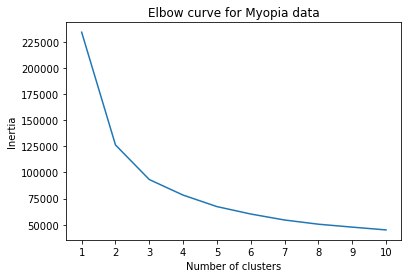

In [12]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()

In [13]:
# Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. 
# The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [14]:
clusters = get_clusters(2, df_myopia)

In [15]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0,0


In [16]:
def show_clusters(df):
    plt.scatter(df_myopia['ACD'], df_myopia['VCD'], c=df_myopia['class'])
    plt.xlabel('ACD')
    plt.ylabel('VCD')
    plt.show()

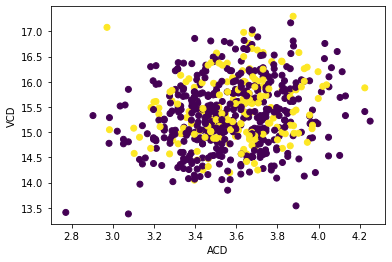

In [17]:
show_clusters(clusters)

## Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

## Answers to questions: 

<b> Are there distinct clusters?</b>
Within the dimentionality reduction, using PCA no visible clusters were found. The patients in this data set could not be clustered. 

<b> -If possible, determine where the elbow of the plot is, and at which value of k it appears.</b>
The value of k in which the elbow appears is 3. 

<b> Reccomendations</b>
The results of the PCA test was inconclusive, more data is needed to make any determinations. 